## ■ Feature Scaling (특성 스케일링)
- **데이터의 값이 너무 크거나, 혹은 작은 경우에 모델 알고리즘 학습과정에서 0으로 수렴하거나 무한으로 발산해 버릴 수 있는 것을 방지**
- **또는 예측 값이 범위를 벗어나는 입력데이터의 값에 더 큰 영향을 받는 것을 방지**
- 일반적으로 대부분의 머신러닝과 최적화 알고리즘은 특성의 스케일이 같을 때 훨씬 성능이 좋다.
- 스케일링은 **전처리 과정으로 모든 자료에 선형 변환을 적용** 하여 전체 자료의 분포를 평균 0, 분산 1이 되도록 만드는 과정
- 스케일링은 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지하고 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상시킴.

## ■ 회귀에서의 스케일링
- 회귀분석에서의 조건수(condition number)는 변화의 비율에 대해 함수가 얼마나 크게 변하는지에 대한 인자 측정치
- 조건수가 크면 약간의 오차만 있어도 전혀 다른 해를 가질 수 있음.

## ■ 회귀 변수제거
### 가. 변수들의 단위 차이가 있는 경우
- 스케일링으로 해결

### 나. 상관관계가 큰 독립 변수들이 있는 경우
- 변수 선택 및 제거나 PCA를 사용한 차원 축소 등으로 해결

### 다. 독립 변수나 종속 변수가 심하게 한쪽으로 치우친 분포를 보이는 경우 (혹은 독립 변수와 종속 변수 간의 관계가 비선형 관계를 보이는 경우)
- **로그함수 or 제곱근 함수를 사용하여 변수를 변환**하면 회귀 성능이 향상될 수 도 있음.

<hr>

![데이터변환1_표준화](img/데이터변환1_표준화.jpg)

### ■ Standardization (표준화)
- 모델링 작업에 들어가기 전에 변수들 간의 척도가 다른 경우에 보통 표준화(Scale Standardization)을 진행하는 것이 일반적 --> 가장중요
- 모수와 비모수 차이 여부 = 표준화 진행 여부 결정
    - 모수 모델 = 정규분포의 영향을 받는 - Regression
    - 비모수모델 = 정규분포 영향 안받는 - Random Forest Tree / KNN

![Standardization](img/Standardization.jpg)

### ■ Scailing data with outliers (표준화)
- **표준화는 일반적으로 이상치 정보가 유지**된다.
- **모든 스케일러 처리 전에는 아웃라이어 제거가 선행되어져야 하며, 데이터의 분포 특징에 따라 적절한 스케일러를 적용해주는 것이 필요.**
![Scaler_type](img/Scaler_type.PNG)

#### 가. StandardScaler (가장 일반적)
- **기존 변수에 범위를 정규 분포로 변환**
- Standard 표준화는 정규분포를 따르는 데이터의 표준 정규분포로의 표준화 (z-standardization) (평균과 표준편차 이용)
- (x - x평균값)/(x의 표준편차)
- **데이터의 최소, 최대 값을 모를 경우 사용**
- 각 Feature의 평균을 0, 분산을 1로 변경하고 모든 특성들이 같은 스케일을 갖게 함. 평균을 제거하고 데이터를 단위 분산으로 조정한다.
- 이상치가 있을 경우 평균과 표준편차에 큰 영향을 미쳐 데이터의 확산은 매우 달라짐. 
- **즉 이상치(Outlier) 가 있는 경우 균형 잡힌 척도를 보장할 수 없게 됨.**

#### 나. RobustScaler
- **아웃라이어의 영향을 최소화환 기법**이다. 
- 중앙값(median)과 IQR(interquartile Range)를 사용하기 때문에 표준화 한 후에 동일한 값을 더 넓게 분포 시킨다.
- IOR = Q3-Q1의 25 percentile과 75percentile의 값들을 다룬다.
- Robust 표준화는 이상치/특이값이 포함되어 있는 데이터의 표준화 (scaling data with outliers) (중앙값과 IQR 이용)
- **즉 이상치(Outlier)가 있더라도 어느정도 균형 잡힌 척도를 보장할 수 있다.**

<hr>

## ■ Standardization - API (소스코드)

### 1) Numpy 
- z=(x-mean()) / std()

### 2) sklearn.preprocessing : 
- StandardScaler()
- RobustScaler()

### 3) scipy.stats : zscore()

<hr>

[[12 26 23 11 29]
 [27 27  5 18 26]
 [ 7  2 13 12 15]
 [ 3 19 19  1  6]
 [14 15  0 25  5]
 [24 29  3 10 14]] 

mean: 14.666666666666666
standard deviation: 9.115310685264046
variance: 83.08888888888889


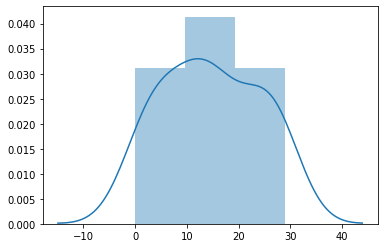

In [11]:
# (0) 데이터생성
import numpy as np

# 여러개 쳐도 나오게
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

data = np.random.randint(30, size=(6,5))
print(data, '\n')

print('mean:', np.mean(data))
print('standard deviation:', np.std(data))
print('variance:', np.var(data))

import seaborn as sns
sns.distplot(data)

## (1) Numpy를 이용한 표준화

array([[-0.29,  0.68,  1.47, -0.25,  1.45],
       [ 1.46,  0.79, -0.65,  0.7 ,  1.12],
       [-0.87, -1.91,  0.29, -0.11, -0.09],
       [-1.34, -0.07,  1.  , -1.6 , -1.08],
       [-0.06, -0.5 , -1.24,  1.65, -1.19],
       [ 1.11,  1.01, -0.88, -0.38, -0.2 ]])

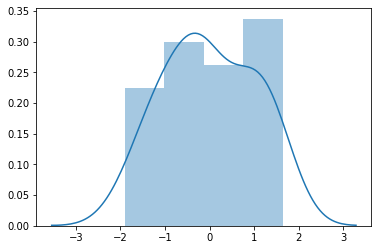

In [13]:
## (1) Numpy를 이용한 표준화
from numpy import *

# (X-mean()) / std()
standardized_np = (data - mean(data, axis=0)) / std(data,axis=0)
standardized_np
sns.distplot(standardized_np)

## (2) sklearn.preprocessing 이용한 표준화

---- 이상치 삽입 전----
평균: 9.774419541681715 표준편차: 1.9896014996828737


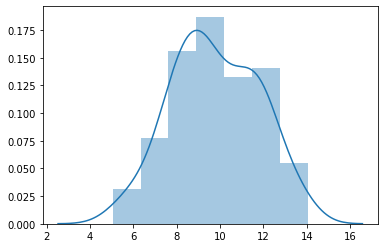

In [15]:
# (2) sklearn.preprocessing을 이용한 표준화 - Standard Scaler vs Robust Scaler

from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import pandas as pd

# setting the number of digits of precision for floating point output
np.set_printoptions(precision=2)

# making 100 random x ~ N(10, 2)
mu, sigma = 10, 2
x = mu + sigma*np.random.randn(100)

print('---- 이상치 삽입 전----')
print('평균:', np.mean(x), '표준편차:', np.std(x))
sns.distplot(x)

---- 이상치 생성 후----
평균: 10.54411361417176 표준편차: 5.972036034805542


(array([50., 48.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 5.06,  9.55, 14.04, 18.54, 23.03, 27.53, 32.02, 36.52, 41.01,
        45.51, 50.  ]),
 <a list of 10 Patch objects>)

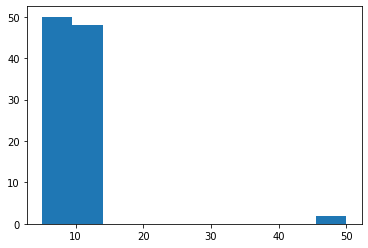

In [16]:
# 이상치 강제 생성
x[98:100] = 50

print('---- 이상치 생성 후----')
print('평균:', np.mean(x), '표준편차:', np.std(x))
plt.hist(x)


---- StandardScaler 생성 후----
평균: 8.881784197001253e-17 분산: 0.9999999999999999 표준편차: 0.9999999999999999


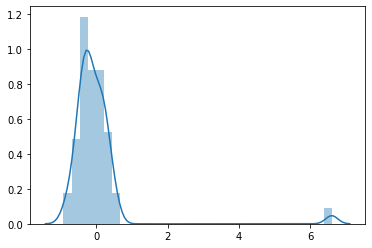

In [29]:
# (1) StandardScaler()
x = x.reshape(-1,1)
x_StandardScaler = StandardScaler().fit_transform(x)

print('---- StandardScaler 생성 후----')
print('평균:', np.mean(x_StandardScaler), 
      '분산:', np.var(x_StandardScaler),
      '표준편차:', np.std(x_StandardScaler))

sns.distplot(x_StandardScaler)

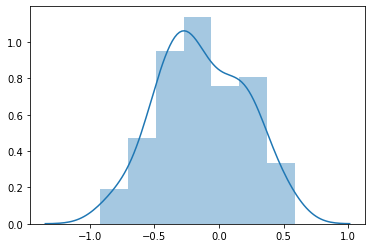

In [20]:
# (1) StandardScaler() - zoom in (잘라내기)

x_StandardScaler_zoomin = x_StandardScaler[x_StandardScaler<4]
sns.distplot(x_StandardScaler_zoomin)
#plt.hist(x_StandardScaler_zoomin)

---- RobustScaler 생성 후----
평균: 0.3237608025812062 분산: 3.439662818210257 표준편차: 1.8546327987529654


(array([50., 48.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-1.38,  0.02,  1.41,  2.81,  4.2 ,  5.6 ,  6.99,  8.39,  9.79,
        11.18, 12.58]),
 <a list of 10 Patch objects>)

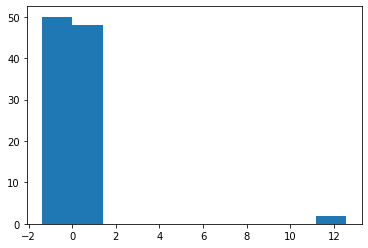

In [27]:
# (1) Robust Scaler (데이터의 median과 IQR을 이용)
x = x.reshape(-1,1)
x_RobustScaler = RobustScaler().fit_transform(x)

print('---- RobustScaler 생성 후----')
print('평균:', np.mean(x_RobustScaler), 
      '분산:', np.var(x_RobustScaler),
      '표준편차:', np.std(x_RobustScaler))

plt.hist(x_RobustScaler)

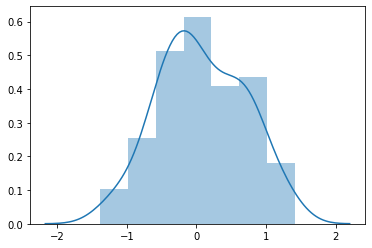

In [26]:
# (1) Robust Scaler (데이터의 median과 IQR을 이용) - zoom in (잘라내기)
x_RombustScaler_zoomin = x_RobustScaler[x_StandardScaler<4]
sns.distplot(x_RombustScaler_zoomin)

In [30]:
print('---- StandardScaler 생성 후----')
print('평균:', np.mean(x_StandardScaler), 
      '분산:', np.var(x_StandardScaler),
      '표준편차:', np.std(x_StandardScaler))

print('---- RobustScaler 생성 후----')
print('평균:', np.mean(x_RobustScaler), 
      '분산:', np.var(x_RobustScaler),
      '표준편차:', np.std(x_RobustScaler))

---- StandardScaler 생성 후----
평균: 8.881784197001253e-17 분산: 0.9999999999999999 표준편차: 0.9999999999999999
---- RobustScaler 생성 후----
평균: 0.3237608025812062 분산: 3.439662818210257 표준편차: 1.8546327987529654


## 결론
- StandardScaler() 에 의한 표준화가 이상치에 영향을 더 심하게 받아서 이상치가 아닌 값들이 조밀하게, 촘촘하게 서로 붙어있음을 알 수 있음.

- **StandardScaler() 보다 RobustScaler()가 동일한 값을 좀더 넓게 분포시키고 있음.** 

- **이는 목표변수 y값을 분류나 예측하는데 있어 산포가 더 크기 때문에 설명변수 x변수로서 더 유용하다고 추정 할 수 있음.**

array([[-0.29,  0.68,  1.47, -0.25,  1.45],
       [ 1.46,  0.79, -0.65,  0.7 ,  1.12],
       [-0.87, -1.91,  0.29, -0.11, -0.09],
       [-1.34, -0.07,  1.  , -1.6 , -1.08],
       [-0.06, -0.5 , -1.24,  1.65, -1.19],
       [ 1.11,  1.01, -0.88, -0.38, -0.2 ]])

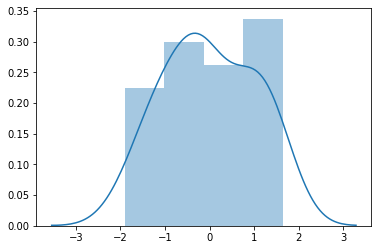

In [31]:
# (2) scipy.stats 를 이용한 표준화
import scipy.stats as ss

# ss.zscore()
data_standadized_ss = ss.zscore(data)
data_standadized_ss

sns.distplot(data_standadized_ss)

## 참고 문헌
- https://ebbnflow.tistory.com/137
- https://mkjjo.github.io/python/2019/01/10/scaler.html
- https://rfriend.tistory.com/269
- https://rfriend.tistory.com/268
- https://rfriend.tistory.com/52 // 그림출처
- https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling // preprocessing data
